In [37]:
import pandas as pd
import numpy as np
import gvar as gv
import lsqfit
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special as spsp 

# input parameters

In [60]:
params = dict()
#
params['ensembles'] = ['l1648f211b580m013m065m838','l2448f211b580m0064m0640m828',\
                       'l2464f211b600m0102m0509m635','l2464f211b600m00507m0507m628','l3264f211b600m00507m0507m628','l4064f211b600m00507m0507m628','l4864f211b600m00184m0507m628',\
                       'l3296f211b630m0074m037m440','l4896f211b630m00363m0363m430']
params['operators'] = ['V','LR','LR_colormix','S','S_colormix']
params['ansatz'] = 'chipt'
params['order'] = 2
params['fv_flag'] = False
params['ma_flag'] = False
params['alphas_flag'] = False
# priors
priors = dict()
N0LO = 100.0
N1LO = 100.0
N2LO = 100.0
# O3
priors['b0.V'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.V'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.V'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.V'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.V'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.V'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.V'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O1
priors['b0.LR'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.LR'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.LR'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.LR'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.LR'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.LR'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.LR'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O2
priors['b0.LR_colormix'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.LR_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.LR_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.LR_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.LR_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.LR_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.LR_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O4
priors['b0.S'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.S'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.S'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.S'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.S'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.S'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.S'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O5
priors['b0.S_colormix'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.S_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.S_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.S_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.S_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.S_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.S_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed

# read data

In [61]:
data_0vbb = pd.read_csv('n0bb_v3.csv')
#data_0vbb.groupby(['hisq_ensembles','operator']).describe()['result']

In [62]:
data_gV = pd.read_csv('./gV.csv')
#data_gV.groupby(['ensemble']).describe()['gv']

In [63]:
data_mm = pd.read_csv('./phi_ju.csv')
#data_mm.groupby(['ensemble']).describe()['E0']

In [64]:
hisq_parameters = pd.read_csv('./hisq_params.csv')
#hisq_parameters

# Renormalization matrix

In [65]:
dzmat = dict()
dzmat['a15'] = gv.gvar([['0.9407(63)',       '0(0)',       '0(0)',       '0(0)',       '0(0)'],\
                        [      '0(0)', '0.9835(68)','-0.0106(18)',       '0(0)',       '0(0)'],\
                        [      '0(0)','-0.0369(30)', '1.0519(80)',       '0(0)',       '0(0)'],\
                        [      '0(0)',       '0(0)',       '0(0)',  '1.020(11)','-0.0356(49)'],\
                        [      '0(0)',       '0(0)',       '0(0)','-0.0485(31)', '0.9519(68)']])

dzmat['a12'] = gv.gvar([['0.9117(43)',       '0(0)',       '0(0)',       '0(0)',       '0(0)'],\
                        [      '0(0)', '0.9535(48)','-0.0130(17)',       '0(0)',       '0(0)'],\
                        [      '0(0)','-0.0284(30)', '0.9922(60)',       '0(0)',       '0(0)'],\
                        [      '0(0)',       '0(0)',       '0(0)', '0.9656(96)','-0.0275(49)'],\
                        [      '0(0)',       '0(0)',       '0(0)','-0.0360(28)', '0.9270(50)']])

dzmat['a09'] = gv.gvar([['0.9017(39)',       '0(0)',       '0(0)',       '0(0)',       '0(0)'],\
                        [      '0(0)', '0.9483(44)','-0.0269(17)',       '0(0)',       '0(0)'],\
                        [      '0(0)','-0.0236(29)', '0.9369(54)',       '0(0)',       '0(0)'],\
                        [      '0(0)',       '0(0)',       '0(0)', '0.9209(91)','-0.0224(49)'],\
                        [      '0(0)',       '0(0)',       '0(0)','-0.0230(28)', '0.9332(47)']])
# V LR LR_colormix S S_colormix
# O3 O1 O2 O4 O5
a015 = ['l1648f211b580m013m065m838','l2448f211b580m0064m0640m828','l3248f211b580m00235m0647m831']
a012 = ['l2464f211b600m0170m0509m635','l2464f211b600m0130m0509m635','l2464f211b600m0102m0509m635',\
        'l2464f211b600m00507m0507m628','l3264f211b600m00507m0507m628','l4064f211b600m00507m0507m628',\
        'l4864f211b600m00184m0507m628']
a009 = ['l3296f211b630m0074m037m440','l4896f211b630m00363m0363m430']
ensemble_to_spacing=dict({i:'a15' for i in a015})
ensemble_to_spacing.update({i:'a12' for i in a012})
ensemble_to_spacing.update({i:'a09' for i in a009})
operator_to_index = {'V':0,'LR':1,'LR_colormix':2,'S':3,'S_colormix':4}
def zmat(ensemble,operator_list):
    alat = ensemble_to_spacing[ensemble]
    operator_index = [operator_to_index[op] for op in operator_list]
    return dzmat[alat][np.ix_(operator_index,operator_index)]
# test
zmat('l1648f211b580m013m065m838',['V','LR','S'])

array([[0.9407(63), 0(0), 0(0)],
       [0(0), 0.9835(68), 0(0)],
       [0(0), 0(0), 1.020(11)]], dtype=object)

# Compile data

In [66]:
# 0vbb data
dict_0vbb = {(ens,op): data_0vbb.query("hisq_ensembles=='%s' and operator=='%s' and fit_n==1"%(ens,op))\
             .sort_values('nbs')['result'].as_matrix()\
             for ens in params['ensembles']\
             for op in params['operators']}
dict_0vbb.update({(ens,'epi'): data_0vbb.query("hisq_ensembles=='%s' and operator=='epi' and fit_n==1" %(ens))\
          .sort_values('nbs')['result'].as_matrix()\
          for ens in params['ensembles']})
dict_0vbb.update({(ens,'fpi'): 1./data_0vbb.query("hisq_ensembles=='%s' and operator=='fpi' and fit_n==1" %(ens))\
          .sort_values('nbs')['result'].as_matrix()\
          for ens in params['ensembles']})
gv_0vbb = gv.dataset.avg_data(dict_0vbb,bstrap=True)
# split data from prior
gv_y = {(ens,op):gv_0vbb[(ens,op)] for ens in params['ensembles'] for op in params['operators']}
gv_efpi = {(ens,op):gv_0vbb[(ens,op)] for ens in params['ensembles'] for op in ['epi','fpi']}
# 
dict_gVmm = {(ens,'gV'): data_gV.query("ensemble=='%s'" %(ens)).sort_values('nbs')['gv'].as_matrix()\
                for ens in params['ensembles']}
dict_gVmm.update({(ens,'phi_ju'): data_mm.query("ensemble=='%s'" %(ens)).sort_values('nbs')['E0'].as_matrix()\
                for ens in params['ensembles']})
dict_gVmm[('l2464f211b600m00507m0507m628','phi_ju')] = data_mm.query("ensemble=='l3264f211b600m00507m0507m628'").sort_values('nbs')['E0'].as_matrix()
dict_gVmm[('l4064f211b600m00507m0507m628','phi_ju')] = data_mm.query("ensemble=='l3264f211b600m00507m0507m628'").sort_values('nbs')['E0'].as_matrix()
gv_gVmm = gv.dataset.avg_data(dict_gVmm,bstrap=True)
gv_mm = {(ens,'phi_ju'):gv_gVmm[(ens,'phi_ju')] for ens in params['ensembles']}
gv_gV = {(ens,'gV'):gv_gVmm[(ens,'gV')] for ens in params['ensembles']}
#
gv_hisq = dict()
for ens in params['ensembles']:
    hp_ens = hisq_parameters.query("ensemble=='%s'" %(ens))
    gv_hisq[(ens,'aw0')] = gv.gvar(hp_ens['aw0_mean'].as_matrix()[0],hp_ens['aw0_sdev'].as_matrix()[0])
    gv_hisq[(ens,'r2di')] = gv.gvar(hp_ens['r2DI_mean'].as_matrix()[0],hp_ens['r2DI_sdev'].as_matrix()[0])
    gv_hisq[(ens,'r1a')] = gv.gvar(hp_ens['r1a_mean'].as_matrix()[0],hp_ens['r1a_sdev'].as_matrix()[0])
gv_hisq.update({(ens,'a2di'):gv_hisq[(ens,'r2di')]/gv_hisq[(ens,'r1a')]**2 for ens in params['ensembles']})
# renormalize y
gv_rey = dict()
for ens in params['ensembles']:
    melem = np.array([gv_y[(ens,op)] for op in params['operators']])
    rmatrix = zmat(ens,params['operators'])
    gV = gv_gV[(ens,'gV')]
    relem = rmatrix.dot(melem.T)/gV**2
    for idx,op in enumerate(params['operators']):
        gv_rey[(ens,op)] = relem[idx]/gv_hisq[(ens,'aw0')]**4 # convert data to w0 units
        
# make x
x = [[ens, op] for ens in params['ensembles'] for op in params['operators']]

# make p
def filter_priors(key):
    if (int(key[1]) <= params['order'] and key.split('.')[1] in params['operators']):
        pfilter = True
    else: pfilter = False
    if key.split('.')[0][0] in ['s'] and not params['alphas_flag']:
        pfilter = False
    return pfilter
gv_p = {key:priors[key] for key in priors.keys()\
        if filter_priors(key)}
gv_p.update(gv_efpi)
gv_p.update({(ens,'ema'):gv_mm[(ens,'phi_ju')]/(4.*np.pi*gv_efpi[(ens,'fpi')]) for ens in params['ensembles']})
gv_p.update({(ens,'epq2'):gv_hisq[(ens,'a2di')]/(4.*np.pi*gv_efpi[(ens,'fpi')])**2 for ens in params['ensembles']})
gv_p.update({(ens,'ea2'):gv_hisq[(ens,'aw0')]**2/(4.*np.pi) for ens in params['ensembles']})
# make variables for fit class initialization
ini = dict()
for ens in params['ensembles']:
    ini[(ens,'alpha_s')] = hisq_parameters.query("ensemble=='%s'" %(ens))['alfs'].as_matrix()[0]
    ini[(ens,'mpiL')] = (float(ens[1:3])*gv_p[(ens,'epi')]*4.*np.pi*gv_p[(ens,'fpi')]).mean
    ini[(ens,'mmaL')] = (float(ens[1:3])*gv_mm[(ens,'phi_ju')]).mean

# DEBUG CELL

('a15m310 ', '0.8804', 0.07487489787461421)
('a15m220 ', '0.8804', 0.072968737488262991)
('a12m310 ', '0.7036', 0.059612699868393966)
('a12m220S', '0.7036', 0.058218330357275049)
('a12m220 ', '0.7036', 0.05823325003862103)
('a12m220L', '0.7036', 0.057085515393201912)
('a12m130 ', '0.7036', 0.054687555857071461)
('a09m310 ', '0.5105', 0.045151994270591966)
('a09m220', '0.5105', 0.042864936092520102)


<Container object of 3 artists>

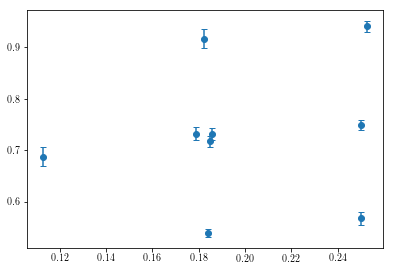

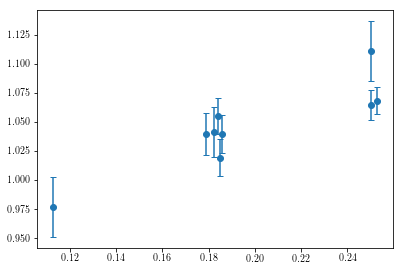

In [70]:
short_name={
    'l1648f211b580m013m065m838':'a15m310 ',
    'l2448f211b580m0064m0640m828':'a15m220 ',
    'l2464f211b600m0102m0509m635':'a12m310 ',
    'l2464f211b600m00507m0507m628':'a12m220S',
    'l3264f211b600m00507m0507m628':'a12m220 ',
    'l4064f211b600m00507m0507m628':'a12m220L',
    'l4864f211b600m00184m0507m628':'a12m130 ',
    'l3296f211b630m0074m037m440':'a09m310 ',
    'l4896f211b630m00363m0363m430':'a09m220'
}
x_epi=[dict_0vbb[(ens,'epi')].mean() for ens in params['ensembles']]
aLam = [4.*np.pi*dict_0vbb[(ens,'fpi')].mean() for ens in params['ensembles']]
e_aLam = [4.*np.pi*dict_0vbb[(ens,'fpi')].std() for ens in params['ensembles']]
aw0 = [hisq_parameters.query("ensemble=='%s'" %(ens))['aw0_mean'].as_matrix()[0] for ens in params['ensembles']]
w0Lam = [4.*np.pi*dict_0vbb[(ens,'fpi')].mean()/aw0[i] for i,ens in enumerate(params['ensembles'])]
e_w0Lam = [4.*np.pi*dict_0vbb[(ens,'fpi')].std()/aw0[i] for i,ens in enumerate(params['ensembles'])]
for i,ens in enumerate(params['ensembles']):
    print(short_name[ens],
          '%.4f' %aw0[i],dict_0vbb[(ens,'fpi')].mean())
fig = plt.figure('aLam')
ax = plt.axes([0.14,0.165,0.825,0.825])
ax.errorbar(x_epi,aLam,yerr=e_aLam,marker='o',linestyle='None')
fig = plt.figure('w0Lam')
ax = plt.axes([0.14,0.165,0.825,0.825])
ax.errorbar(x_epi,w0Lam,yerr=e_w0Lam,marker='o',linestyle='None')

# Define fit function

In [9]:
class fit_class(object):
    def __init__(self,ansatz,order=1,fv_flag=False,ma_flag=False,alphas_flag=False,ini=None):
        self.ansatz = ansatz
        self.order = order
        self.fv_flag = fv_flag
        self.ma_flag = ma_flag
        self.alphas_flag = alphas_flag
        if alphas_flag:
            ensembles = [k[0] for k in ini.keys() if k[1] is 'alpha_s']
            self.alpha_s = {ens:ini[(ens,'alpha_s')] for ens in ensembles}
        if self.fv_flag:
            absn_multiplicity = np.array([6,12,8,6,24,24,0,12,30,24,24,8,24,48,0,6,48,36,24,24]) # |n| multiplicity
            absn = np.sqrt(np.arange(1,len(absn_multiplicity)+1)) # L2 length in 3D
            ensembles = [k[0] for k in ini.keys() if k[1] is 'mpiL']
            mpiLn = {ens:absn*ini[(ens,'mpiL')] for ens in ensembles}
            K1 = {ens:spsp.kn(1,mpiLn[ens]) for ens in ensembles}
            self.fv_correction = {(ens,'log'): 4.*np.sum(absn_multiplicity*K1[ens]/mpiLn[ens]) for ens in ensembles}
            if self.ma_flag:
                mmaLn = {ens:absn*ini[(ens,'mmaL')] for ens in ensembles}
                K1 = {ens:spsp.kn(1,mmaLn[ens]) for ens in ensembles}
                self.fv_correction.update({(ens,'malog'): 4.*np.sum(absn_multiplicity*K1[ens]/mmaLn[ens])\
                                           for ens in ensembles})
                K0 = {ens:spsp.kn(0,mpiLn[ens]) for ens in ensembles}
                self.fv_correction.update({(ens,'pqlog'): 1.-2.*np.sum(absn_multiplicity*K0[ens])\
                                           for ens in ensembles})
    def fvlog(self,ens,p):
        r = np.log(p[(ens,'epi')]**2)
        if self.fv_flag:
            r += self.fv_correction[(ens,'log')]
        return r
    def mafvlog(self,ens,p):
        r = np.log(p[(ens,'ema')]**2)
        if self.fv_flag and not self.ma_flag:
            r += self.fv_correction[(ens,'log')]
        elif self.fv_flag:
            r += self.fv_correction[(ens,'malog')]
        return r
    def pqlog(self,ens,p):
        r = np.log(p[(ens,'epi')]**2)
        if self.fv_flag:
            r += self.fv_correction[(ens,'pqlog')]
        return r
    def LO_analytic(self,x,p):
        ens = x[0]
        op = x[1]
        epi = p[(ens,'epi')]
        ea2 = p[(ens,'ea2')]
        r = p['c1.%s' %op]*epi**2+p['a1.%s' %op]*ea2
        if self.alphas_flag:
            r += self.alpha_s[ens]*p['s1.%s' %op]*ea2
        return r
    def NLO_analytic(self,x,p):
        ens = x[0]
        op = x[1]
        epi = p[(ens,'epi')]
        ea2 = p[(ens,'ea2')]
        r = p['a2.%s' %op]*ea2**2+p['c2.%s' %op]*epi**4+p['m2.%s' %op]*epi**2*ea2
        return r
    def xpt(self,x,p):
        # unpack parameters
        ens = x[0]
        op = x[1]
        epi = p[(ens,'epi')]
        ea2 = p[(ens,'ea2')]
        Lam = 4.*np.pi*p[(ens,'fpi')]
        coeff = p['b0.%s' %op]*Lam**4/(4.*np.pi)**2
        if self.ma_flag:
            ema = p[(ens,'ema')]
            epq2 = p[(ens,'epq2')]
        else:
            ema = p[(ens,'epi')]
            epq2 = 0
        # O1,O2,O4,O5
        if op in ['LR','LR_colormix','S','S_colormix']:
            r = coeff * (1.+2.*ema**2*self.mafvlog(ens,p)+1./3.*epi**2*self.fvlog(ens,p))
            r += coeff * self.LO_analytic(x,p)
            if op in ['S','S_colormix']:
                r += coeff * (-2.*epq2*self.pqlog(ens,p))
            if self.order > 1:
                r += coeff * self.NLO_analytic(x,p)
        # O3
        if op in ['V']:
            coeff = coeff * epi**2
            r = coeff * (1.+2.*ema**2*self.mafvlog(ens,p)-2./3.*epi**2*self.fvlog(ens,p))
            r += coeff * self.LO_analytic(x,p)
            if self.order > 1:
                r += coeff * self.NLO_analytic(x,p)
        return r
    def fit_function(self,x,p):
        result = dict()
        for xi in x:
            result[(xi[0],xi[1])] = self.xpt(xi,p)
        return result
                

In [10]:
# initiate fit class
FitClass = fit_class(params['ansatz'],params['order'],params['fv_flag'],params['ma_flag'],params['alphas_flag'],ini)
fit = lsqfit.nonlinear_fit(data=(x,gv_rey),prior=gv_p,fcn=FitClass.fit_function)
print(fit.format())

Least Square Fit:
  chi2/dof [dof] = 1.3 [40]    Q = 0.076    logGBF = 119.17

Parameters:
                                    b0.V     -43.9 (4.6)      [       0 (100) ]  
                                    c1.V       5.6 (1.6)      [       0 (100) ]  
                                    a1.V     -35.0 (1.3)      [       0 (100) ]  
                                    c2.V          1 (18)      [       0 (100) ]  
                                    a2.V        318 (15)      [       0 (100) ]  ***
                                    m2.V        -46 (18)      [       0 (100) ]  
                                   b0.LR      55.7 (5.0)      [       0 (100) ]  
                                   c1.LR       4.6 (2.4)      [       0 (100) ]  
                                   a1.LR     -31.1 (1.9)      [       0 (100) ]  
                                   c2.LR         16 (25)      [       0 (100) ]  
                                   a2.LR        274 (20)      [       0 (100) ]  **
  

In [11]:
0.25**2

0.0625